In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
pd.set_option('display.max_row', 1000) #affichier 100 lignes 
pd.set_option('display.max_column', 16) #affichier 15 colonnes 

In [4]:
data = pd.read_excel(r"C:\Users\amald\OneDrive\Documents\MEMOIRE_IFID\BD_finale.xlsx") #importer dataset

In [5]:
data.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


# Analyse de la forme des données

In [6]:
df = data.copy()

In [7]:
df.shape #nombres de colonnes et lignes 

(18897, 16)

In [8]:
df.dtypes #types de variables 

ID                                        int64
Rachat                                    int64
Prime                                   float64
Fréquence                                object
Date_Effet                       datetime64[ns]
Date_Echéance                    datetime64[ns]
Durée_Contrat                           float64
Réseau_Distribution                      object
Date_de_naissance                datetime64[ns]
Age_Souscription                        float64
Age_Survenance                          float64
Sexe                                     object
Status_Contrat                           object
Date_Survenance                          object
Ancienneté_Contrat_Survenance           float64
Durée_Restante_Echéance                 float64
dtype: object

In [9]:
df.dtypes.value_counts() #compter le nombre de types de variables 

float64           6
object            5
datetime64[ns]    3
int64             2
dtype: int64

In [10]:
df.isna()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

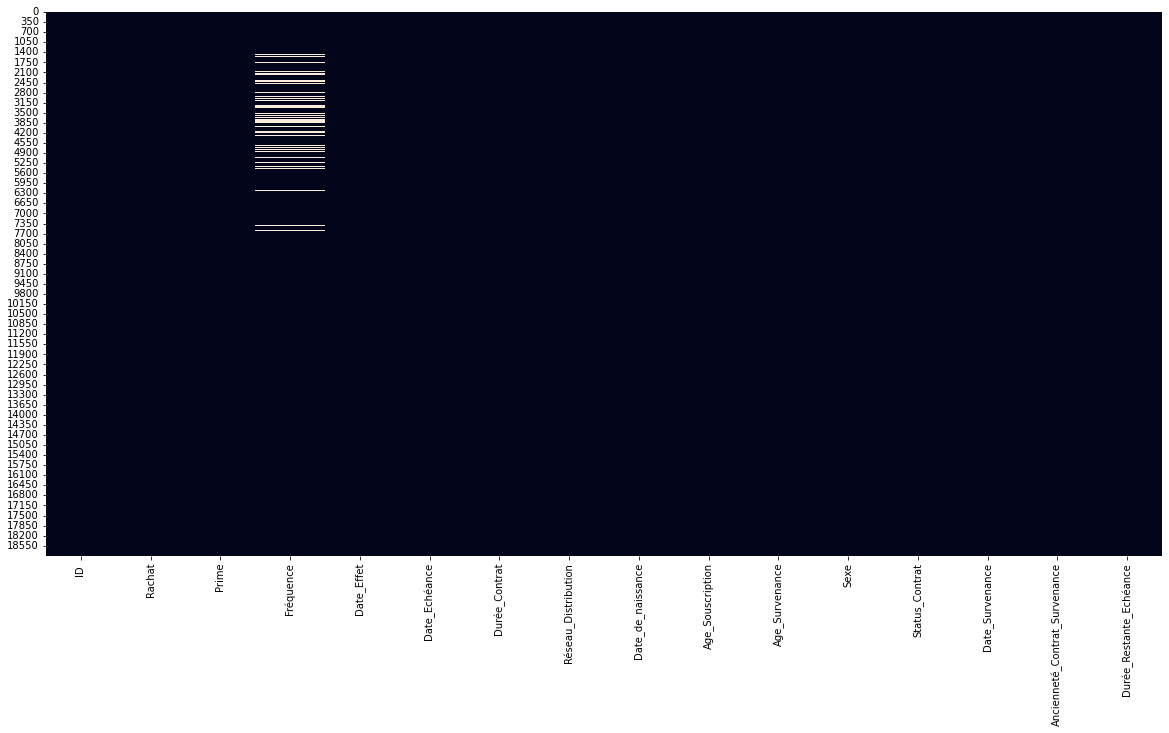

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) #pourcentages de valeurs manquantes par variable par ordre ascendent

ID                               0.000000
Rachat                           0.000000
Prime                            0.000000
Durée_Contrat                    0.000000
Réseau_Distribution              0.000000
Sexe                             0.000000
Status_Contrat                   0.000000
Date_Survenance                  0.000000
Ancienneté_Contrat_Survenance    0.000000
Durée_Restante_Echéance          0.000000
Date_de_naissance                0.000106
Age_Survenance                   0.000106
Date_Effet                       0.000529
Date_Echéance                    0.000529
Age_Souscription                 0.000635
Fréquence                        0.054718
dtype: float64

# Analyse du Fond

## 1. Visulation initiale - Elimination des colonnes inutiles

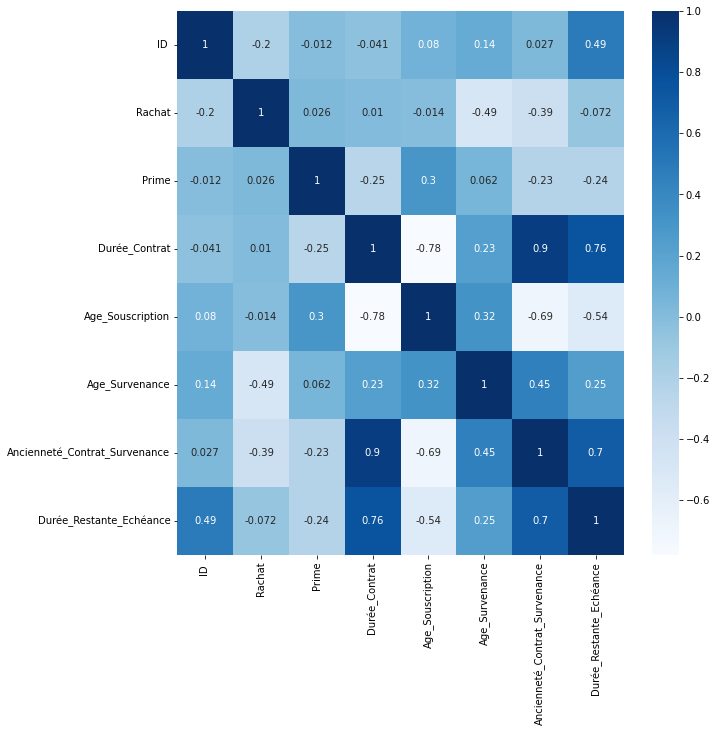

In [13]:
#Préparation des données
#Matrice de correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

On remarque une **forte correlation de 0.9 entre Durée_contrat et Ancienneté_Contrat_Survenance** et **une corrélation de 0.7 entre Durée_restante_Echéance et Ancienneté_Contrat_Survenance** .On supprimera donc les variables **Durée_Contrat** et **Durée_Restante_Echéance**.

In [14]:
df.drop("Durée_Contrat", axis=1, inplace=True)

In [15]:
df.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [16]:
df

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753
1,1715,0,5196.80,T,1992-09-03,2016-07-08,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274
2,4036,0,1496.88,A,1986-04-25,2016-03-02,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973
3,5212,0,145.50,A,1988-02-03,2015-11-11,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041
4,6026,0,2174.76,A,1986-09-09,2016-07-15,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,280200,0,952.56,T,2016-08-05,2053-12-19,Producteur,1986-01-27,30.0,67.939726,M,Encours,2053-12-19 00:00:00,37.397260
18893,280213,0,934.56,S,2016-08-15,2033-12-03,Producteur,1974-10-05,41.0,59.202740,F,Encours,2033-12-03 00:00:00,17.312329
18894,280221,0,7560.00,A,2016-08-13,2041-11-29,Agent,1976-03-21,40.0,65.736986,M,Encours,2041-11-29 00:00:00,25.312329
18895,280239,0,1134.00,S,2016-08-15,2051-02-05,Producteur,1986-07-30,30.0,64.564384,M,Encours,2051-02-05 00:00:00,34.498630


## 2. Analyse de la variable target

In [17]:
df['Rachat']

0        0
1        0
2        0
3        0
4        0
        ..
18892    0
18893    0
18894    0
18895    0
18896    0
Name: Rachat, Length: 18897, dtype: int64

In [18]:
df['Rachat'].value_counts(normalize=True)

0    0.953591
1    0.046409
Name: Rachat, dtype: float64

Seulement **4.64%** des contrats sont rachetés; contre **95.35%** qui sont soit encours soit echus. Donc on voit clairement que nos données sont **déséquilibrées**

## Histogrammes des variables continues 

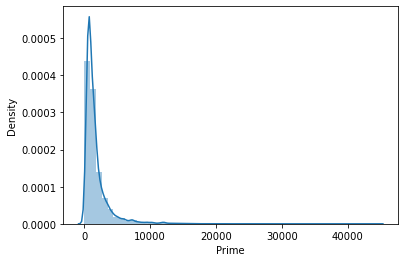

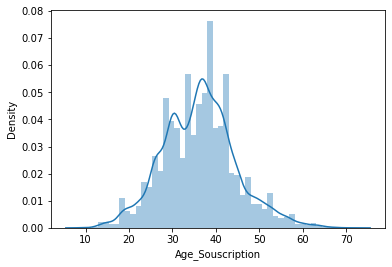

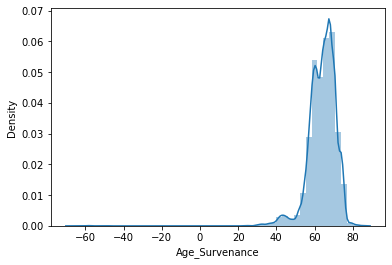

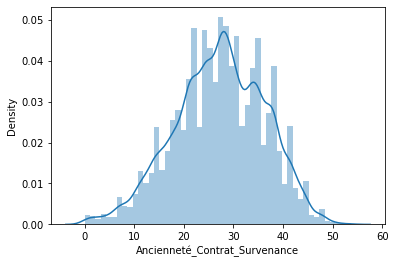

In [19]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col]) 

### variables qualitatives 

In [20]:
df['Fréquence'].unique()

array([nan, 'T', 'A', 'S', 'M'], dtype=object)

In [21]:
for col in df.select_dtypes('object'):
    print(col,df[col].unique() )

Fréquence [nan 'T' 'A' 'S' 'M']
Réseau_Distribution ['Producteur ' 'Agent']
Sexe ['M' 'F']
Status_Contrat ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


In [22]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}') #on change la forme d'affichage

Fréquence----------------------------------------- [nan 'T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']
Status_Contrat------------------------------------ ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance----------------------------------- [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


# Pré-traitement de données 

In [23]:
df = data.copy()
df.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


In [24]:
df.columns


Index(['ID ', 'Rachat', 'Prime', 'Fréquence', 'Date_Effet', 'Date_Echéance',
       'Durée_Contrat', 'Réseau_Distribution', 'Date_de_naissance',
       'Age_Souscription', 'Age_Survenance', 'Sexe', 'Status_Contrat',
       'Date_Survenance', 'Ancienneté_Contrat_Survenance',
       'Durée_Restante_Echéance'],
      dtype='object')

In [25]:
data = df.drop(['ID ', 'Date_Effet','Date_Echéance', 'Date_de_naissance',
       'Status_Contrat','Date_Survenance'], axis=1) 
#Eliminer les variables non utiles 

In [26]:
data.head()


,Rachat,Prime,Fréquence,Durée_Contrat,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,0,1296.88,NaN,23.865753,Producteur,34.0,57.934247,M,23.865753,0.0
1,0,5196.80,T,23.860274,Producteur,34.0,58.356164,M,23.860274,0.0
2,0,1496.88,A,29.873973,Producteur,32.0,62.347945,M,29.873973,0.0
3,0,145.50,A,27.789041,Producteur,34.0,62.350685,F,27.789041,0.0
4,0,2174.76,A,29.868493,Producteur,28.0,58.413699,M,29.868493,0.0


In [27]:
data.shape

(18897, 10)

In [28]:
data = data.dropna(axis=0)
data.shape

(17855, 10)

In [29]:
data.describe()

,Rachat,Prime,Durée_Contrat,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
count,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000
mean,0.045029,1783.837462,27.919342,36.385438,64.050809,27.141172,20.382020
std,0.207374,2049.331000,8.347539,8.408454,6.843959,8.997640,9.042965
min,0.000000,7.400000,0.531507,9.000000,22.668493,0.030137,0.000000
25%,0.000000,720.230000,22.095890,31.000000,60.024658,21.284932,13.838356
50%,0.000000,1164.700000,27.901370,37.000000,64.945205,27.476712,20.991781
75%,0.000000,1999.140000,34.210959,41.000000,68.512329,33.605479,26.604110
max,1.000000,44487.300000,53.791781,72.000000,85.939726,53.791781,47.498630


In [30]:
data.drop("Durée_Contrat", axis=1, inplace=True)

In [31]:
data.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [32]:
data

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,5196.80,T,Producteur,34.0,58.356164,M,23.860274
2,0,1496.88,A,Producteur,32.0,62.347945,M,29.873973
3,0,145.50,A,Producteur,34.0,62.350685,F,27.789041
4,0,2174.76,A,Producteur,28.0,58.413699,M,29.868493
5,0,2536.38,T,Producteur,37.0,67.558904,M,29.868493
...,...,...,...,...,...,...,...,...
18892,0,952.56,T,Producteur,30.0,67.939726,M,37.397260
18893,0,934.56,S,Producteur,41.0,59.202740,F,17.312329
18894,0,7560.00,A,Agent,40.0,65.736986,M,25.312329
18895,0,1134.00,S,Producteur,30.0,64.564384,M,34.498630


In [33]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}') 

Fréquence----------------------------------------- ['T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']


In [77]:
data.dropna(axis=0 , inplace = True)

In [78]:
data.shape


(16813, 8)

## Encodage Selection des variables

In [79]:
#creation d'une fontion encodage pour l'utiliser aprés sur le testset
def encodage(data):
    code = {'M':3,
            'T':2,
            'S':1,
            'A':0,
            'Producteur ':0,
            'Agent':1,
            'M':0,
            'F':1,
           }
    
    for col in data.select_dtypes('object').columns:
        data.loc[:,col] = data[col].map(code)
        
    return data

In [80]:
data = encodage(data)

In [81]:
data.describe()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
count,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000
mean,0.047820,0.039755,0.372450,0.179504,0.435983,0.655687,0.363171,0.504711
std,0.213392,0.046253,0.753993,0.383785,0.133718,0.106533,0.480928,0.166823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000357
25%,0.000000,0.015927,0.000000,0.000000,0.349206,0.591972,0.000000,0.395403
50%,0.000000,0.025587,0.000000,0.000000,0.444444,0.669611,0.000000,0.510523
75%,0.000000,0.044057,0.000000,0.000000,0.507937,0.725427,1.000000,0.624675
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On remarque que nos variables quantitatives sont à plus grandes échelle.Or que les algorithmes d'apprentissage automatique donneront plus d'importance aux variables à plus grande échelle.Donc cela nécessite une mise à échelle de nos données.

In [82]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = ['Prime','Age_Souscription','Age_Survenance','Ancienneté_Contrat_Survenance']
mms = MinMaxScaler()
scaled = mms.fit_transform(data[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    data[col] = scaled[col]
    
data.head()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,0.003105,2,0,0.396825,0.627176,0,0.516160
2,0,0.048727,0,0,0.301587,0.564952,0,0.554853
3,0,0.056857,0,0,0.444444,0.709492,1,0.554853
4,0,0.045724,0,0,0.460317,0.691262,0,0.523756
5,0,0.028161,2,0,0.460317,0.718628,0,0.554904


In [83]:
data.columns

Index(['Rachat', 'Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance'],
      dtype='object')

<AxesSubplot:>

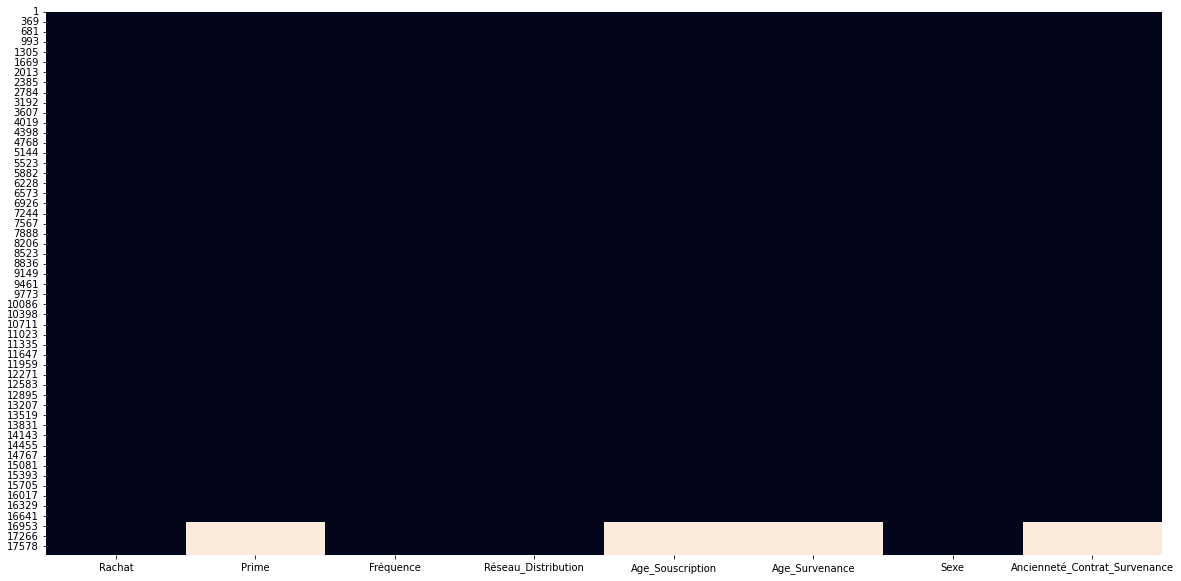

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [108]:
data.dropna(axis=0 , inplace = True)

In [110]:
data.shape

(15772, 8)

In [330]:
var_quali=['Fréquence','Réseau_Distribution','Sexe']
var_quanti=['Prime','Age_Souscription', 'Age_Survenance','Ancienneté_Contrat_Survenance']
df1=data[var_quali]
df2=data[var_quanti]

In [335]:
y=data['Rachat']

In [336]:
y

1        0
2        0
3        0
4        0
5        0
        ..
16808    0
16809    0
16810    0
16811    0
16812    0
Name: Rachat, Length: 15772, dtype: int64

In [357]:
df1


,Fréquence,Réseau_Distribution,Sexe
1,2,0,0
2,0,0,0
3,0,0,1
4,0,0,0
5,2,0,0
...,...,...,...
16808,0,0,1
16809,0,0,0
16810,0,0,0
16811,2,0,0


In [358]:
df1

,Fréquence,Réseau_Distribution,Sexe
1,2,0,0
2,0,0,0
3,0,0,1
4,0,0,0
5,2,0,0
...,...,...,...
16808,0,0,1
16809,0,0,0
16810,0,0,0
16811,2,0,0


In [359]:
df2

,Prime,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
1,0.003105,0.396825,0.627176,0.516160
2,0.048727,0.301587,0.564952,0.554853
3,0.056857,0.444444,0.709492,0.554853
4,0.045724,0.460317,0.691262,0.523756
5,0.028161,0.460317,0.718628,0.554904
...,...,...,...,...
16808,0.021249,0.333333,0.715511,0.694943
16809,0.020844,0.507937,0.577423,0.321217
16810,0.169798,0.492063,0.680696,0.470075
16811,0.025328,0.333333,0.662163,0.641007


In [360]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
chi2(df1,y)

(array([5.47893816, 8.86219573, 1.28219812]),
 array([0.01924695, 0.00291137, 0.25749073]))

In [362]:
#Selection des variables
selector = SelectKBest(chi2,k=2)
selector.fit(df1, y)
np.array(var_quali)[selector.get_support()]

array(['Fréquence', 'Réseau_Distribution'], dtype='<U19')

In [363]:
selector.get_support()

array([ True,  True, False])

In [364]:
df2

,Prime,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
1,0.003105,0.396825,0.627176,0.516160
2,0.048727,0.301587,0.564952,0.554853
3,0.056857,0.444444,0.709492,0.554853
4,0.045724,0.460317,0.691262,0.523756
5,0.028161,0.460317,0.718628,0.554904
...,...,...,...,...
16808,0.021249,0.333333,0.715511,0.694943
16809,0.020844,0.507937,0.577423,0.321217
16810,0.169798,0.492063,0.680696,0.470075
16811,0.025328,0.333333,0.662163,0.641007


In [365]:
f_classif(df2,y)

(array([  2.91175386,  40.81063572, 208.8875644 ,  21.59883248]),
 array([8.79558869e-02, 1.72417611e-10, 4.79962310e-47, 3.38776442e-06]))

In [366]:
selector1 = SelectKBest(f_classif,k=3)
selector1.fit(df2, y)
np.array(var_quanti)[selector1.get_support()]

array(['Age_Souscription', 'Age_Survenance',
       'Ancienneté_Contrat_Survenance'], dtype='<U29')

In [367]:
var_select=['Fréquence', 'Réseau_Distribution','Age_Souscription', 'Age_Survenance',
       'Ancienneté_Contrat_Survenance']

X= data[var_select]
X 

,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
1,2,0,0.396825,0.627176,0.516160
2,0,0,0.301587,0.564952,0.554853
3,0,0,0.444444,0.709492,0.554853
4,0,0,0.460317,0.691262,0.523756
5,2,0,0.460317,0.718628,0.554904
...,...,...,...,...,...
16808,0,0,0.333333,0.715511,0.694943
16809,0,0,0.507937,0.577423,0.321217
16810,0,0,0.492063,0.680696,0.470075
16811,2,0,0.333333,0.662163,0.641007


# Modélisation

In [368]:
import sklearn
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [401]:
# Splitting Train and Test Data
X_train,X_test,y_train,y_test  = train_test_split(X,
                                              y,
                                              test_size=0.3,
                                              random_state = 42)
columns = X_train.columns

In [402]:
X_train

,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
9736,0,0,0.269841,0.535204,0.556332
12345,0,1,0.412698,0.584871,0.456209
7063,0,1,0.492063,0.686499,0.479456
6139,0,0,0.444444,0.605569,0.441884
16586,1,0,0.698413,0.784143,0.345330
...,...,...,...,...,...
6100,0,0,0.380952,0.727851,0.647991
14457,2,0,0.444444,0.681476,0.526509
6322,0,0,0.571429,0.767602,0.472624
917,0,0,0.444444,0.709015,0.556332


In [403]:
X_test

,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance
15384,0,1,0.380952,0.823807,0.765192
14802,0,0,0.539683,0.626093,0.355373
15304,0,1,0.476190,0.605049,0.395137
10232,0,0,0.460317,0.572616,0.377855
10612,0,0,0.365079,0.729627,0.680771
...,...,...,...,...,...
2642,1,0,0.238095,0.613623,0.678681
3554,2,0,0.285714,0.671863,0.703864
10014,0,0,0.396825,0.713605,0.616130
7959,0,0,0.587302,0.763185,0.445198


## REGRESSION LOGISTIQUE

In [370]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model1 = LogisticRegression()

params = {
    'penalty'      : ['none', 'l1', 'l2', 'elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept': [True, False]
}
search = GridSearchCV(model1, params, scoring='accuracy', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9501811594202896
Best Hyperparameters: {'C': 0.001, 'fit_intercept': True, 'penalty': 'none', 'solver': 'newton-cg'}


In [371]:
model_lr=LogisticRegression(C= 0.001, fit_intercept=True, penalty='none', solver='newton-cg')
model_lr.fit(X_train, y_train)
pred_lr= search.predict(X_test)

#### EVALUATION


Accuracy = 0.95
Recall = 0.00



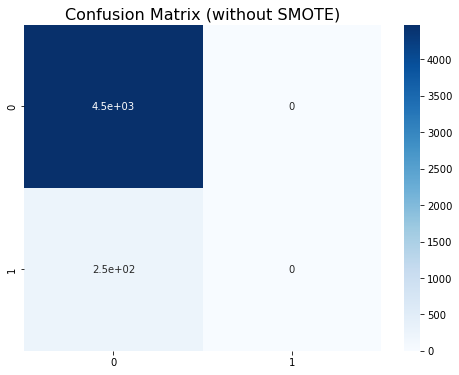

In [372]:
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred_lr):.2f}\nRecall = {recall_score(y_test, pred_lr):.2f}\n')
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

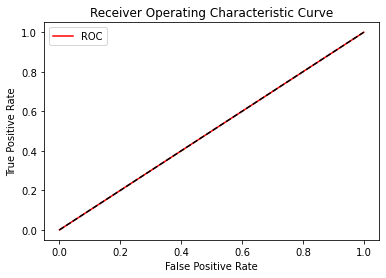

In [375]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred = model_lr.predict(X_test)  
fper, tper, thresholds = roc_curve(y_test, pred)
plot_roc_curve(fper, tper)

**Le modèle de régression logistique est précis à 95 %**, alors où est le problème ? Oui, il peut classer correctement presque toutes les contrats non rachetés. Mais il a également **classé 100% des contrats rachetés comme non rachetés**. En un mot, le modèle est inutilisable. Le déséquilibre des classes a tué sa performance. **SMOTE** peut nous aider.

**SMOTE**

In [376]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [377]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 40,)
X_train_sm, y_train_sm =sm.fit_resample(X_train, y_train)


[[2782 1696]
 [ 120  134]]
              precision    recall  f1-score   support

           0       0.96      0.62      0.75      4478
           1       0.07      0.53      0.13       254

    accuracy                           0.62      4732
   macro avg       0.52      0.57      0.44      4732
weighted avg       0.91      0.62      0.72      4732



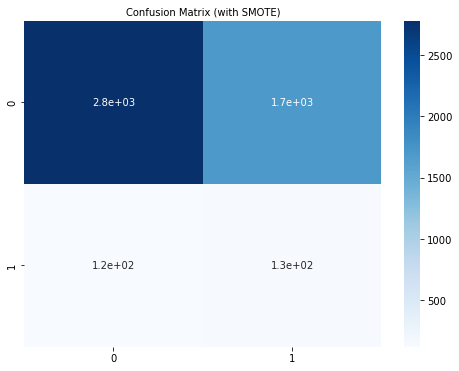

In [378]:
model_lr_sm=LogisticRegression(C= 0.001, fit_intercept=False, penalty='none', solver='newton-cg')
model_lr_sm.fit(X_train_sm, y_train_sm)
pred_sm= model_lr_sm.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_sm))
cm = confusion_matrix(y_test, pred_sm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=10)
sns.heatmap(cm, annot=True, cmap='Blues')

print(classification_report(y_test, pred_sm))


On constate qu'après le smote la précision du modèle 1 a diminué mais son **Rappel est passé de 0% à 53%**.

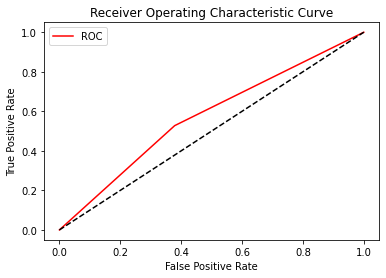

In [379]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()  
fper, tper, thresholds = roc_curve(y_test, pred_sm)
plot_roc_curve(fper, tper)

**SMOTE-ENN**

In [354]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [355]:
sm_enn=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
X_train_enn, y_train_enn =sm_enn.fit_resample(X_train, y_train)

[[2342 2136]
 [  96  158]]
              precision    recall  f1-score   support

           0       0.96      0.52      0.68      4478
           1       0.07      0.62      0.12       254

    accuracy                           0.53      4732
   macro avg       0.51      0.57      0.40      4732
weighted avg       0.91      0.53      0.65      4732



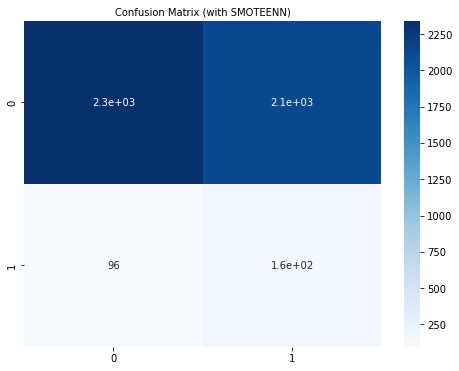

In [356]:
model_lr_enn=LogisticRegression(C= 0.001, fit_intercept=False, penalty='none', solver='newton-cg')
model_lr_enn.fit(X_train_enn, y_train_enn)
pred_enn= model_lr_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_enn))
cm = confusion_matrix(y_test, pred_enn)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTEENN)', size=10)
sns.heatmap(cm, annot=True, cmap='Blues')

print(classification_report(y_test, pred_enn))


**pas d'amélioration avec SMOTEENN**

## ARBRE DE DECISION

Accuracy = 0.95
Recall = 0.01



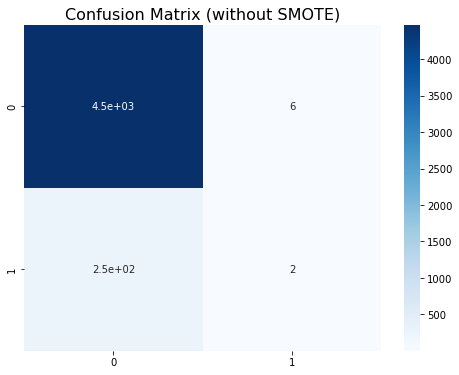

In [418]:
model2 = DecisionTreeClassifier(max_depth=5)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred2):.2f}\nRecall = {recall_score(y_test, pred2):.2f}\n')
cm = confusion_matrix(y_test, pred2)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

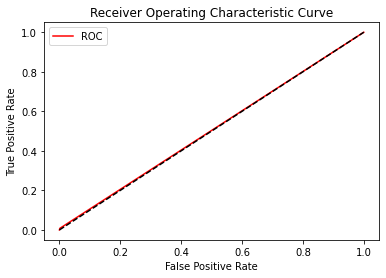

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4478
           1       0.25      0.01      0.02       254

    accuracy                           0.95      4732
   macro avg       0.60      0.50      0.49      4732
weighted avg       0.91      0.95      0.92      4732



In [419]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred2 = model2.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred2))

Accuracy = 0.81
Recall = 0.34



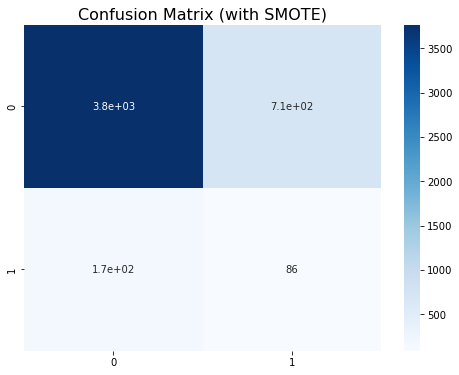

In [423]:
model2_sm = DecisionTreeClassifier(max_depth=14)
model2_sm.fit(X_train_sm, y_train_sm)
pred2_sm = model2_sm.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, pred2_sm):.2f}\nRecall = {recall_score(y_test, pred2_sm):.2f}\n')
cm = confusion_matrix(y_test, pred2_sm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [267]:
# Evaluate

print(classification_report(y_test, pred2_sm))
    
    

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      4478
           1       0.12      0.22      0.15       254

    accuracy                           0.87      4732
   macro avg       0.54      0.56      0.54      4732
weighted avg       0.91      0.87      0.89      4732



 la précision a diminé et le rappel après le smote passe de 19% à 22%

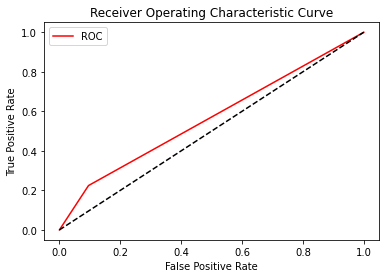

In [290]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred2_sm = model2_sm.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2_sm)
plot_roc_curve(fper, tper)



**SMOTEENN**

[[3813  665]
 [ 160   94]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4478
           1       0.12      0.37      0.19       254

    accuracy                           0.83      4732
   macro avg       0.54      0.61      0.54      4732
weighted avg       0.91      0.83      0.86      4732



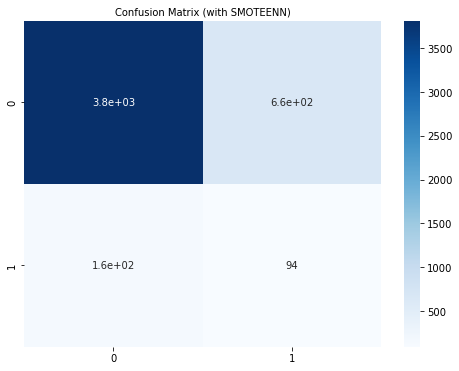

In [269]:
model2_enn = DecisionTreeClassifier()
model2_enn.fit(X_train_enn, y_train_enn)
pred2_enn= model2_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred2_enn))
cm = confusion_matrix(y_test, pred2_enn)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTEENN)', size=10)
sns.heatmap(cm, annot=True, cmap='Blues')

print(classification_report(y_test, pred2_enn))


 la précision a passé à 82% et le rappel après le SMOTEENN passe de 21% à 37%

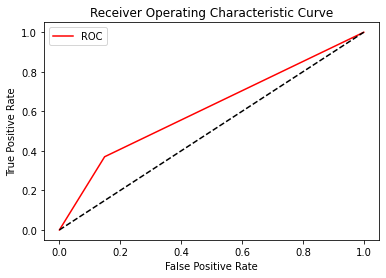

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4478
           1       0.12      0.37      0.19       254

    accuracy                           0.83      4732
   macro avg       0.54      0.61      0.54      4732
weighted avg       0.91      0.83      0.86      4732



In [270]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred2_enn = model2_enn.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred2_enn)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred2_enn))

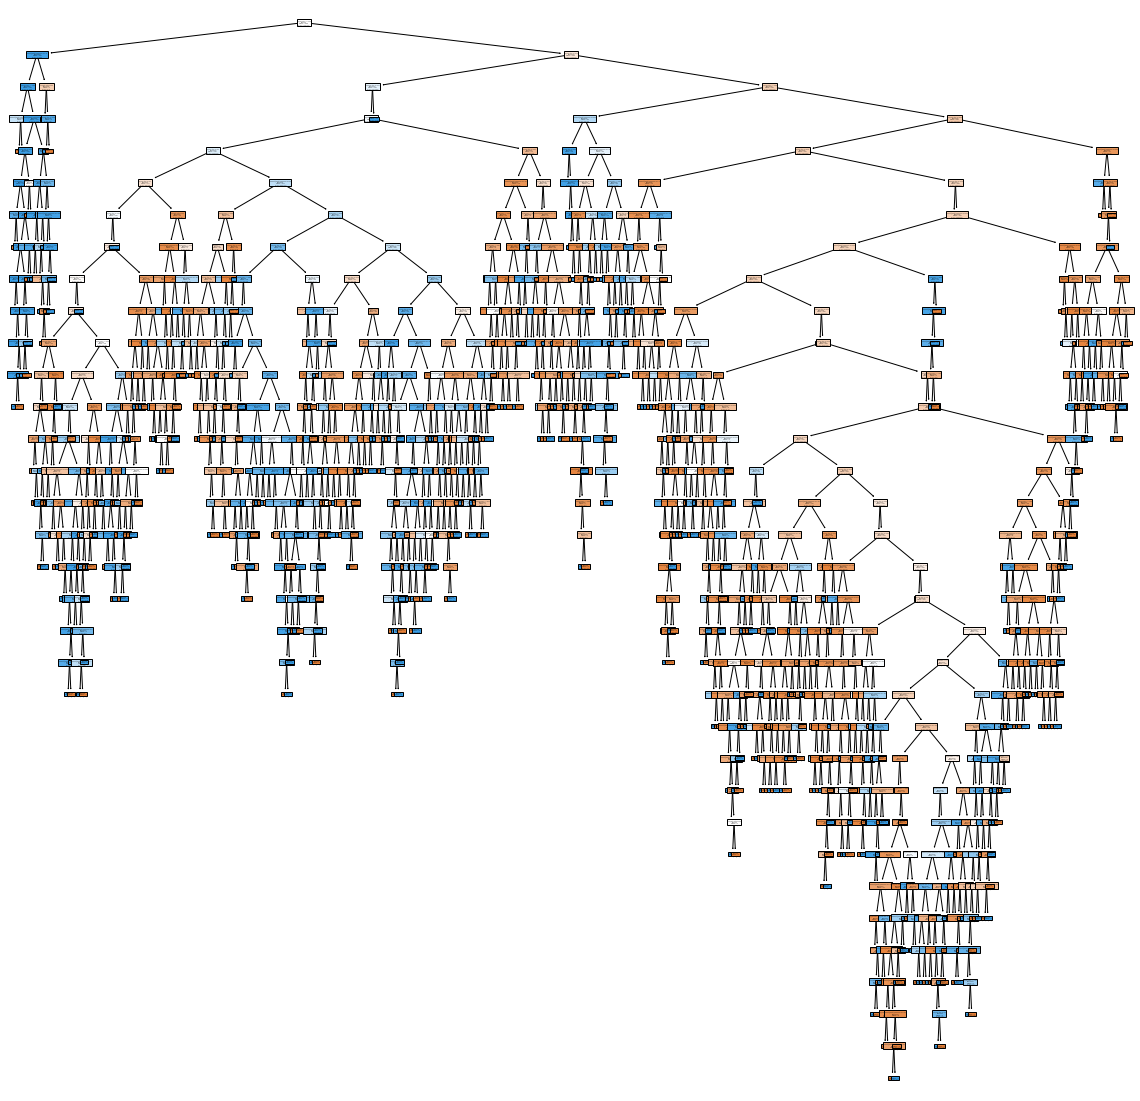

In [425]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model2_enn,feature_names = list(X.columns),filled=True)
plt.show()

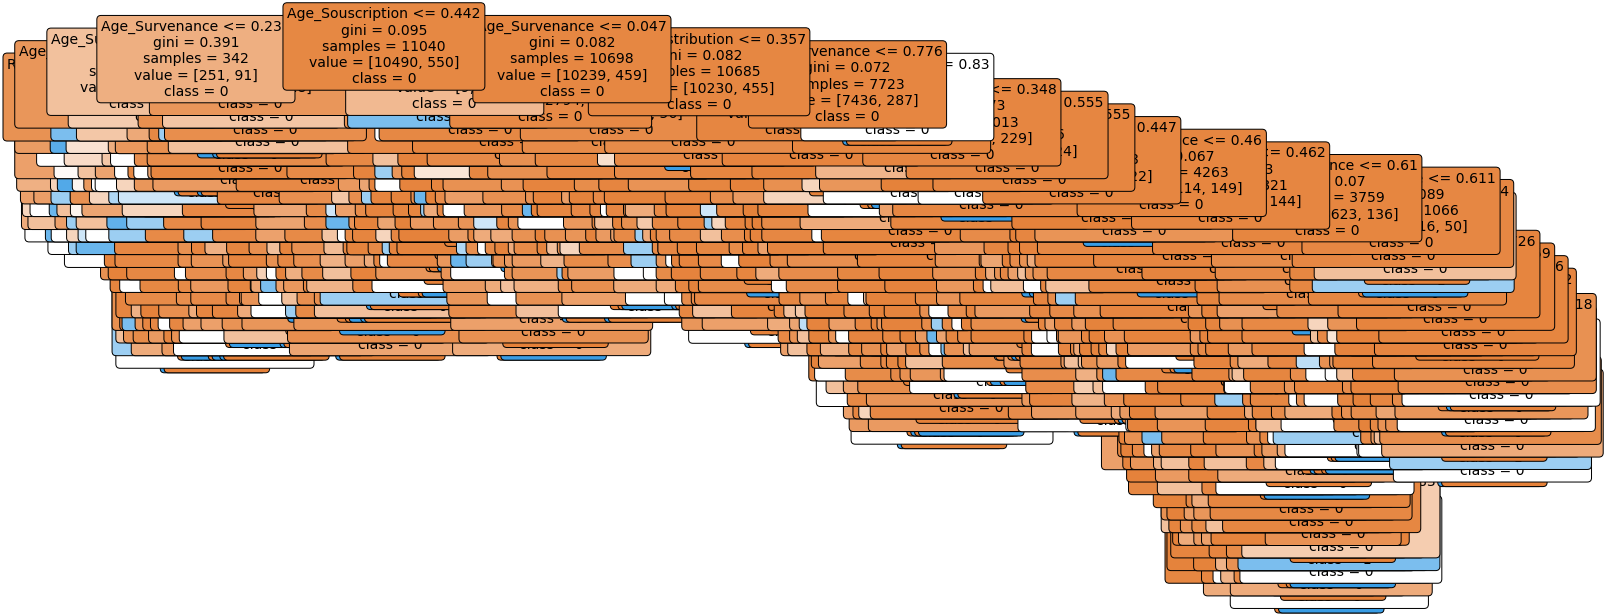

In [417]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(model2, 
              feature_names=data.drop('Rachat', axis=1).columns,    
              class_names=data['Rachat'].unique().astype(str), 
              filled=True, 
              rounded=True, 
              fontsize=14)

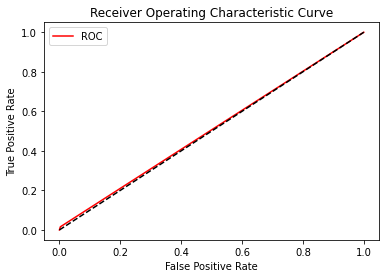

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4478
           1       0.22      0.02      0.03       254

    accuracy                           0.94      4732
   macro avg       0.58      0.51      0.50      4732
weighted avg       0.91      0.94      0.92      4732



In [412]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred_d= model_d.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred_d)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred_d))

In [286]:
print(model2_sm.feature_importances_)

[0.03582626 0.02701145 0.37456478 0.25052044 0.31207706]


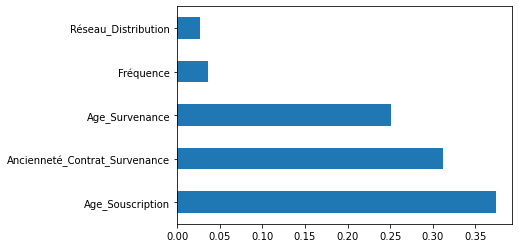

In [285]:
#plot the graph of feature importances 
feat_importances = pd.Series(model2_sm.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

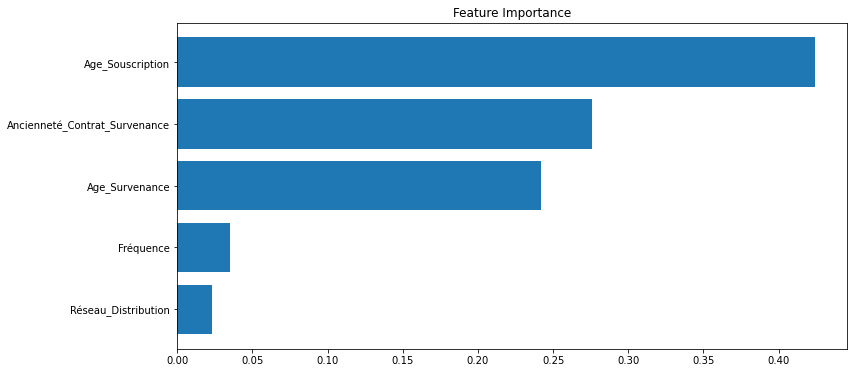

In [424]:
feature_importance = model2_sm.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


## RONDOM FOREST

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500, random_state=42)

**SANS SMOTE**

Accuracy = 0.95
Recall = 0.01



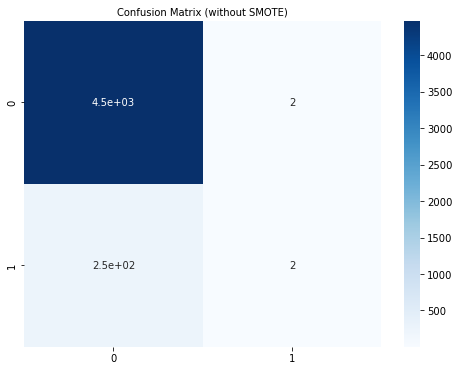

In [291]:
model3 = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500, random_state=42)
model3.fit(X_train, y_train)
pred3= model3.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred):.2f}\nRecall = {recall_score(y_test, pred3):.2f}\n')
cm = confusion_matrix(y_test, pred3)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=10)
sns.heatmap(cm, annot=True, cmap='Blues');

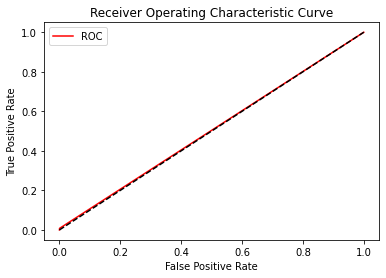

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4478
           1       0.50      0.01      0.02       254

    accuracy                           0.95      4732
   macro avg       0.72      0.50      0.49      4732
weighted avg       0.92      0.95      0.92      4732



In [296]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred3 = model3.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred3)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred3))

**AVEC SMOTE**

Accuracy = 0.83
Recall = 0.34



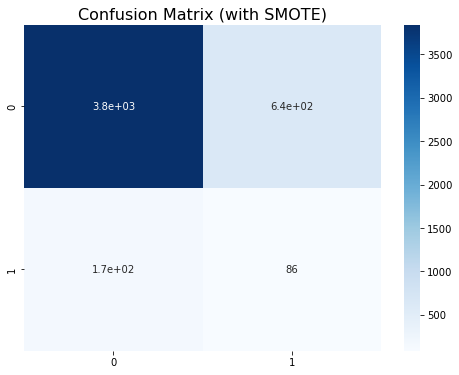

In [297]:
model3_sm = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500, random_state=42)
model3_sm.fit(X_train_sm, y_train_sm)
pred3_sm = model3_sm.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, pred3_sm):.2f}\nRecall = {recall_score(y_test, pred3_sm):.2f}\n')
cm = confusion_matrix(y_test, pred3_sm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

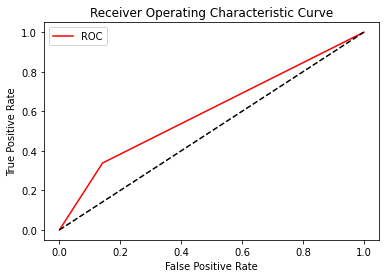

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4478
           1       0.12      0.34      0.18       254

    accuracy                           0.83      4732
   macro avg       0.54      0.60      0.54      4732
weighted avg       0.91      0.83      0.87      4732



In [299]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred3_sm = model3_sm.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred3_sm)
plot_roc_curve(fper, tper)

print(classification_report(y_test, pred3_sm))

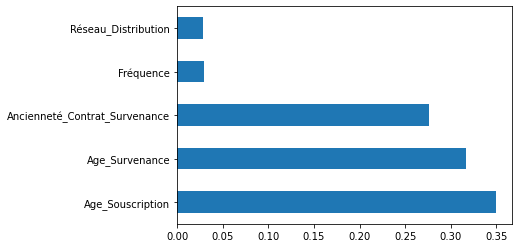

In [382]:
feat_importances_model3sm= pd.Series(model3_sm.feature_importances_, index=X_train.columns)
feat_importances_model3sm.nlargest(10).plot(kind='barh')
plt.show()

In [380]:
feat_importances_model3sm.nlargest(10)

Age_Souscription                 0.349792
Age_Survenance                   0.316387
Ancienneté_Contrat_Survenance    0.276287
Fréquence                        0.029762
Réseau_Distribution              0.027771
dtype: float64

**avec smoteenn**

[[3759  719]
 [ 160   94]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      4478
           1       0.12      0.37      0.18       254

    accuracy                           0.81      4732
   macro avg       0.54      0.60      0.54      4732
weighted avg       0.91      0.81      0.86      4732



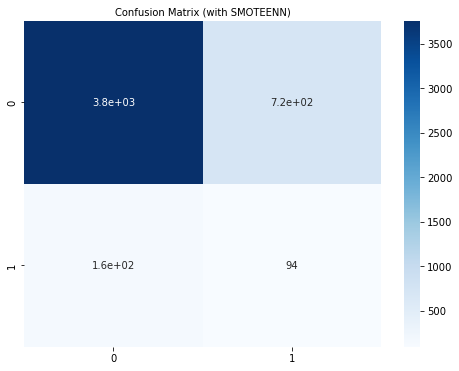

In [308]:
model3_enn = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500, random_state=42)
model3_enn.fit(X_train_enn, y_train_enn)
pred3_enn= model3_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred3_enn))
cm = confusion_matrix(y_test, pred3_enn)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTEENN)', size=10)
sns.heatmap(cm, annot=True, cmap='Blues')

print(classification_report(y_test, pred3_enn))


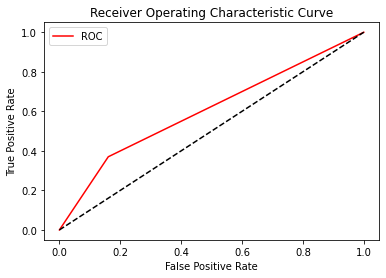

In [309]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred3_enn = model3_enn.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred3_enn)
plot_roc_curve(fper, tper)

# XGBOOST

Accuracy = 0.94
Recall = 0.04



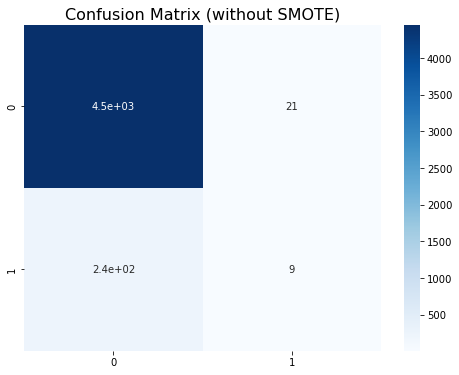

In [383]:
import xgboost as xgb
model4 = xgb.XGBClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, pred4):.2f}\nRecall = {recall_score(y_test, pred4):.2f}\n')
cm = confusion_matrix(y_test, pred4)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.91
Recall = 0.16



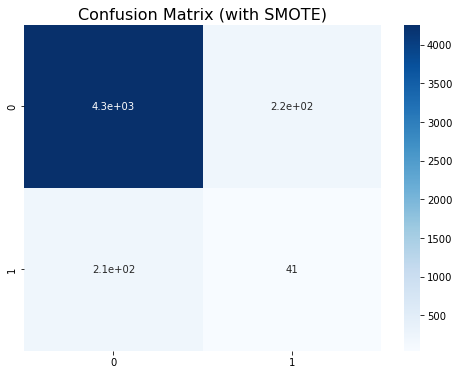

In [384]:
model4_sm= xgb.XGBClassifier()
model4_sm.fit(X_train_sm, y_train_sm)
pred4_sm = model4_sm.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, pred4_sm):.2f}\nRecall = {recall_score(y_test, pred4_sm):.2f}\n')
cm = confusion_matrix(y_test, pred4_sm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

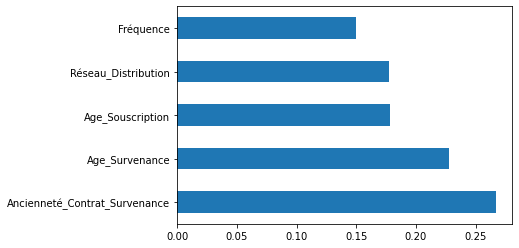

In [416]:
feat_importances_model4= pd.Series(model4.feature_importances_, index=X_train.columns)
feat_importances_model4.nlargest(10).plot(kind='barh')
plt.show()

In [427]:
feat_importances_model4.nlargest(10)

Ancienneté_Contrat_Survenance    0.267288
Age_Survenance                   0.227618
Age_Souscription                 0.178017
Réseau_Distribution              0.177259
Fréquence                        0.149818
dtype: float32

In [429]:
 print(confusion_matrix(y_test, pred4_sm))
print(classification_report(y_test, pred4_sm))

[[4260  218]
 [ 213   41]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4478
           1       0.16      0.16      0.16       254

    accuracy                           0.91      4732
   macro avg       0.56      0.56      0.56      4732
weighted avg       0.91      0.91      0.91      4732

